Name:V.Harish
reg No:AIE22063

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import openpyxl

df=pd.read_excel("C:\\Users\\HarishVReddy\\Downloads\\Traing_Data_analysis 1.xlsx")


A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If your data deals with multiple classes, you can take any two classes. Steps below (refer below diagram for understanding):•Calculate the mean for each class (also called as class centroid)(Suggestion: You may use numpy.mean()function for finding the average vector for all vectors in a given class. Please define the axis property appropriatelyto use this function.EX: feat_vecs.mean(axis=0))
•Calculate spread (standard deviation) for each class(Suggestion: You may use numpy.std()function for finding the standard deviationvector for all vectors in a given class. Please define the axis property appropriately to use this function.)
•Calculate the distance between mean vectors between classes(Suggestion: numpy.linalg.norm(centroid1 –centroid2)gives the Euclidean distance between two centroids.)

In [2]:
mean0fgrade = df['grade'].mean()
class1_feat_vecs = np.array([])
class2_feat_vecs = np.array([])
 
# Create a new column in df based on the condition
df['results'] = np.where(df['grade'] > mean0fgrade, 1, 0)
 
# Append values to class1_feat_vecs and class2_feat_vecs based on the new column
class1_feat_vecs = np.append(class1_feat_vecs, df[df['results'] == 1]['grade'].values)
class2_feat_vecs = np.append(class2_feat_vecs, df[df['results'] == 0]['grade'].values)
 
centroid1 = class1_feat_vecs.mean(axis=0)
centroid2 = class2_feat_vecs.mean(axis=0)
 
# Calculate the spread (standard deviation) for each class
spread1 = class1_feat_vecs.std(axis=0)
spread2 = class2_feat_vecs.std(axis=0)
 
# Calculate the distance between the centroids of the two classes
interclass_distance = np.linalg.norm(centroid1 - centroid2)
 
print(f"Centroid of Class 1: {centroid1}, Spread: {spread1}")
print(f"Centroid of Class 2: {centroid2}, Spread: {spread2}")
print(f"Interclass Distance: {interclass_distance}")
result = df['results']  

Centroid of Class 1: 0.9767086330935251, Spread: 0.04226877001138608
Centroid of Class 2: 0.600436046511628, Spread: 0.18493347792865555
Interclass Distance: 0.3762725865818971


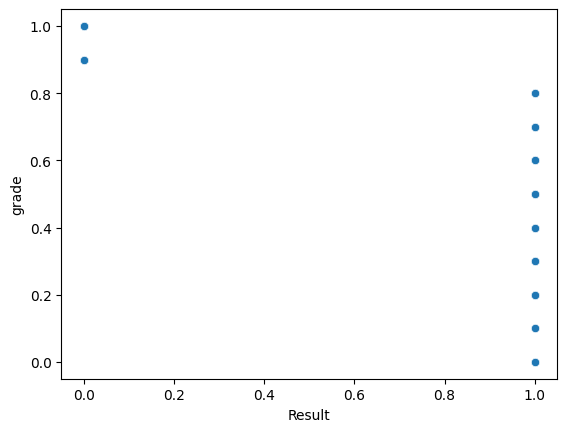

,question,model_answer,student_answer,grade,source,ID,results,Result
0,what is a recursive function?,a function that calls itself.,it is a function that calls itself. it runs ...,1.0,short_answer_grading.csv,0,1,0
1,what are the similarities between iteration an...,they both involve repetition; they both have t...,"both based on control statement, involve repet...",1.0,short_answer_grading.csv,0,1,0
2,what is a queue?,"a data structure that can store elements, whic...",is a particular kind of collection in which th...,1.0,short_answer_grading.csv,0,1,0
3,what is a pointer?,the address of a location in memory.,a pointer is a variable that holds the address...,1.0,short_answer_grading.csv,0,1,0
4,what is the role of a header-file?,"to store a class interface, including data mem...",to separate the source code from the main func...,0.7,short_answer_grading.csv,0,0,1


In [3]:
import seaborn as sns

mean=np.mean(df['grade'])
df['Result']=np.where(df["grade"]>mean ,0,1)
sns.scatterplot(x='Result', y='grade', data=df)

plt.show()
df.head()

A4. Divide dataset in your project into two parts –train & test set.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
grad=df['grade']

X_train,X_test,Y_train,Y_test = train_test_split(grad,result, test_size=0.01, shuffle=True)

grad1=np.reshape(grad,(-1,1))

#Training data
X_train1=np.reshape(X_train,(-1,1))
Y_train1=np.reshape(Y_train,(-1,1))

#Testing data
X_test1=np.reshape(X_test,(-1,1))
Y_test1=np.reshape(Y_test,(-1,1))

A5. Train a kNN classifier (k =3)using the training set obtained from above exercise.

In [18]:
knn=KNeighborsClassifier(3)     #Creating KNeighborsClassifier object with nearest neighbors=3
knn.fit(X_train1,Y_train)       #fitting training data to the knn

KNeighborsClassifier(n_neighbors=3)

A6. Test the accuracy of the kNNusing the test set obtained from above exercise.

In [19]:
knn.score(X_test1,Y_test)       #model accuracy

1.0

A7. Use the predict() function to study the prediction behavior of the classifier for test vectors

In [20]:
knn.predict(X_test1)        #model prediction for the test data

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 11 and make an accuracy plot.

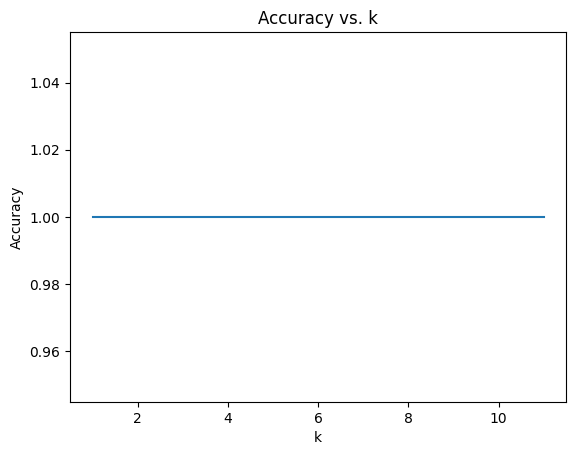

In [30]:
accuracies = []
for k in range(1, 12):      ##Checking the model performance with varying k values between 1 to 12
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, Y_train)
    accuracy = knn.score(X_test1, Y_test)
    accuracies.append(accuracy)

plt.plot(range(1, 12), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()

A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#model prediction
train_predictions = knn.predict(X_train1)
test_predictions = knn.predict(X_test1)

#Training data confusion matrix
train_conf_matrix = confusion_matrix(Y_train, train_predictions)
print("Confusion Matrix for Training Data:")
print(train_conf_matrix)

#Testing data confusion matrix
test_conf_matrix = confusion_matrix(Y_test, test_predictions)
print("Confusion Matrix for Test Data:")
print(test_conf_matrix)

#precision
train_precision = precision_score(Y_train, train_predictions, average=None)
print("Precision for Training Data:", train_precision)
test_precision = precision_score(Y_test, test_predictions, average=None)
print("Precision for Test Data:", test_precision)

#Recall
train_recall = recall_score(Y_train, train_predictions, average=None)
print("Recall for Training Data:", train_recall)
test_recall = recall_score(Y_test, test_predictions, average=None)
print("Recall for Test Data:", test_recall)

#f1 score
train_f1 = f1_score(Y_train, train_predictions, average=None)
print("F1-score for Training Data:", train_f1)
test_f1 = f1_score(Y_test, test_predictions, average=None)
print("F1-score for Test Data:", test_f1)

Confusion Matrix for Training Data:
[[ 684    0]
 [   0 1098]]
Confusion Matrix for Test Data:
[[ 4  0]
 [ 0 14]]
Precision for Training Data: [1. 1.]
Precision for Test Data: [1. 1.]
Recall for Training Data: [1. 1.]
Recall for Test Data: [1. 1.]
F1-score for Training Data: [1. 1.]
F1-score for Test Data: [1. 1.]
